In [1]:
BEIJING, CHANGCHUN, MULUMUQI, WUHAN, GUNAGHZOU, SHENZHEN, BANGKOK, SHANGHAI, NEWYORK = """
BEIJING CHANGCHUN MULUMUQI WUHAN GUANGZHOU SHENZHEN BANGKOK SHANGHAI NEWYORK
""".split()

In [2]:
dictionary = {}

In [3]:
connection = {
    CHANGCHUN: [BEIJING],
    MULUMUQI: [BEIJING], 
    BEIJING: [MULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUNAGHZOU],
    GUNAGHZOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUNAGHZOU]
}

In [4]:
connection[CHANGCHUN]

['BEIJING']

In [4]:
import networkx as nx

In [5]:
%matplotlib inline

In [6]:
graph = connection

In [7]:
g = nx.Graph(graph)

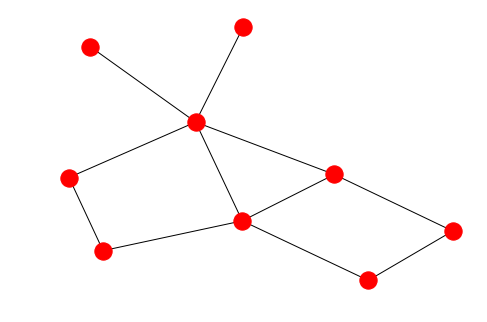

In [8]:
nx.draw(g)

In [23]:
def nagivator(start, destination, connection_graph):
    pathes = [start,]  
    seen = set()
    while pathes:
        froniter = pathes.pop()
        
        if froniter in seen: continue  
            
        print('I am standing at {}'.format(froniter))
        successors = connection_graph[froniter]
        for s in successors:
            print('\t---- I am look forward: {}'.format(s))
        if s == destination:
            return pathes
        pathes += successors
        seen.add(froniter)

In [24]:
nagivator(CHANGCHUN,BANGKOK,connection)   #北京-纽约-上海-武汉-广州-曼谷

I am standing at CHANGCHUN
	---- I am look forward: BEIJING
I am standing at BEIJING
	---- I am look forward: MULUMUQI
	---- I am look forward: CHANGCHUN
	---- I am look forward: WUHAN
	---- I am look forward: SHENZHEN
	---- I am look forward: NEWYORK
I am standing at NEWYORK
	---- I am look forward: BEIJING
	---- I am look forward: SHANGHAI
I am standing at SHANGHAI
	---- I am look forward: NEWYORK
	---- I am look forward: WUHAN
I am standing at WUHAN
	---- I am look forward: SHANGHAI
	---- I am look forward: BEIJING
	---- I am look forward: GUANGZHOU
I am standing at GUANGZHOU
	---- I am look forward: WUHAN
	---- I am look forward: BANGKOK


['MULUMUQI',
 'CHANGCHUN',
 'WUHAN',
 'SHENZHEN',
 'BEIJING',
 'NEWYORK',
 'SHANGHAI',
 'BEIJING']

In [5]:
def nagivator2(start, destination, connection_graph):
    pathes = [[start] ]  #存一个list，跑过的整个路劲
    seen = set()
    
    while pathes:
        path = pathes.pop(0)  #pop取第一个
        froniter = path[-1]
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]   #看第一个点和那些点连着
        
        for s in successors: 
            if s == destination: 
                path.append(s)
                return path
            else:
                pathes.append(path + [s])  
#         print(pathes)        
        pathes = sorted(pathes, key=len) # 最小换乘   寻找最优路劲  len=pathes里元素的个数
                
        seen.add(froniter)

In [6]:
nagivator2(CHANGCHUN,BANGKOK,connection)  

[['CHANGCHUN', 'BEIJING']]
[['CHANGCHUN', 'BEIJING', 'MULUMUQI'], ['CHANGCHUN', 'BEIJING', 'CHANGCHUN'], ['CHANGCHUN', 'BEIJING', 'WUHAN'], ['CHANGCHUN', 'BEIJING', 'SHENZHEN'], ['CHANGCHUN', 'BEIJING', 'NEWYORK']]
[['CHANGCHUN', 'BEIJING', 'CHANGCHUN'], ['CHANGCHUN', 'BEIJING', 'WUHAN'], ['CHANGCHUN', 'BEIJING', 'SHENZHEN'], ['CHANGCHUN', 'BEIJING', 'NEWYORK'], ['CHANGCHUN', 'BEIJING', 'MULUMUQI', 'BEIJING']]
[['CHANGCHUN', 'BEIJING', 'SHENZHEN'], ['CHANGCHUN', 'BEIJING', 'NEWYORK'], ['CHANGCHUN', 'BEIJING', 'MULUMUQI', 'BEIJING'], ['CHANGCHUN', 'BEIJING', 'WUHAN', 'SHANGHAI'], ['CHANGCHUN', 'BEIJING', 'WUHAN', 'BEIJING'], ['CHANGCHUN', 'BEIJING', 'WUHAN', 'GUANGZHOU']]


['CHANGCHUN', 'BEIJING', 'SHENZHEN', 'BANGKOK']

In [28]:
def draw_route(routes):
    print('->'.join(routes))

In [29]:
draw_route(nagivator2(CHANGCHUN,BANGKOK,connection))

CHANGCHUN->BEIJING->SHENZHEN->BANGKOK


In [30]:
def nagivator_bfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = pathes + successors   #广度优先
                
        seen.add(froniter)

In [31]:
nagivator_bfs(CHANGCHUN, BANGKOK, connection)

standing on CHANGCHUN Looking forward ['BEIJING']
standing on BEIJING Looking forward ['MULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
standing on MULUMUQI Looking forward ['BEIJING']
standing on WUHAN Looking forward ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
standing on SHENZHEN Looking forward ['WUHAN', 'BANGKOK']
standing on NEWYORK Looking forward ['BEIJING', 'SHANGHAI']
standing on SHANGHAI Looking forward ['NEWYORK', 'WUHAN']
standing on GUANGZHOU Looking forward ['WUHAN', 'BANGKOK']
standing on BANGKOK Looking forward ['SHENZHEN', 'GUANGZHOU']


In [32]:
connection_2 = {
    0: [1, 5], 
    1: [0, 2], 
    2: [1, 3], 
    3: [2, 4], 
    4: [3],
    5: [0, 6], 
    6: [5, 7],
    7: [6]
}

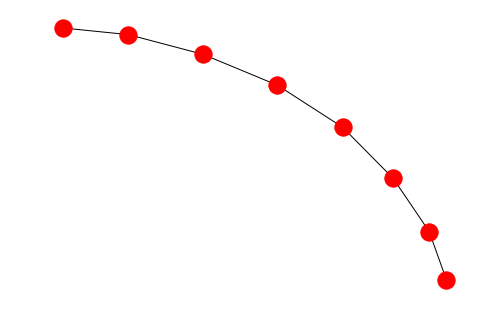

In [33]:
nx.draw(nx.Graph(connection_2))

In [34]:
nagivator_bfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 5 Looking forward [0, 6]
standing on 2 Looking forward [1, 3]
standing on 6 Looking forward [5, 7]
standing on 3 Looking forward [2, 4]
standing on 7 Looking forward [6]
standing on 4 Looking forward [3]


In [35]:
def nagivator_dfs(start, destination, connection_graph):
    pathes = [start ]
    seen = set()
    
    while pathes:
        froniter = pathes.pop(0)
        
        if froniter in seen: continue
            
        successors = connection_graph[froniter]
        print('standing on {} Looking forward {}'.format(froniter, successors))
        pathes = successors + pathes   #深度优先,先走到最深，没有的时候在回过头看     
                                       #bfs与dfs的区别：把新看到的放在前面，先扩展-dfs；新看到的放到后面，后扩展-bfs        
        seen.add(froniter)

In [36]:
nagivator_dfs(0, 7, connection_2)

standing on 0 Looking forward [1, 5]
standing on 1 Looking forward [0, 2]
standing on 2 Looking forward [1, 3]
standing on 3 Looking forward [2, 4]
standing on 4 Looking forward [3]
standing on 5 Looking forward [0, 6]
standing on 6 Looking forward [5, 7]
standing on 7 Looking forward [6]


In [37]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""

In [39]:
import random

In [41]:
def adj(): return random.choice(["蓝色的","好看的","小小的"])

In [42]:
adj()

'小小的'

In [43]:
def noun(): return random.choice(" 女人 |  篮球 | 桌子 | 小猫".split('|'))

In [45]:
noun()

' 小猫'

In [ ]:
generate(' verb_phrase') = generate(' verb_phrase') + generate(' noun_phrase')
generate(' noun') = random.choice(" 女人 |  篮球 | 桌子 | 小猫".split('|'))

In [46]:
def parse_grammar(grammar_str, sep='=>'):
    grammar = {}
    for line in grammar_str.split('\n'): 
        line = line.strip()
        if not line: continue
        
        target, rules = line.split(sep)    #前面为目标，后面为规则
        
        grammar[target.strip()] = [r.split() for r in rules.split('|')]
    
    return grammar

In [49]:
g = parse_grammar(grammar)

In [50]:
g

{'Adj': [['蓝色的'], ['好看的'], ['小小的']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'sentence': [['noun_phrase', 'verb_phrase']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'verb_phrase': [['verb', 'noun_phrase']]}

In [51]:
def gene(grammar_parsed, target='sentence'):
    if target not in grammar_parsed: return target  #出口
    
    rule = random.choice(grammar_parsed[target])
    return ''.join(gene(grammar_parsed, target=r) for r in rule if r!='null')

In [52]:
g['sentence']

[['noun_phrase', 'verb_phrase']]

In [53]:
gene(g)

'这个小小的小小的篮球听着一个小小的小猫'

In [54]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [55]:
for i in range(20):
    print(gene(parse_grammar(decimal_grammar, sep='='), target='expression'))

35/7+3+6
9-5+4*4
6/1-3-8
1+6*4*7
0*8-2+78
5-4+8-7
3-1-9*2
2+2*4/7
2/6+4/4
7-2-6*0
7+4-2-19
5*9/9+78
4*3/9+4
5*4/2-0
7+0*3*1
0+1*0+6
8-3+0/8
6*9+3/9
4/88-5/1
9+0+0*3


In [ ]:
数据驱动  类似的没有见过的情况